# Linear Regression with NumPy

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook (that is intended to be analyzed in parallel with *Linear_Regression_with_One_Neuron.ipynb*) is to show a Linear Regression example performed with traditional math formulas and implemented with NumPy Python library.

## Notebook Learning Goals

At the end of the notebook you are going to know every math detail behind linear regression. Moreover, you will have see an example of **matrix operations** in Python, performed with NumPy library. It is very useful to know this library, since it is the most famous and used package for scientific computing in Python.

## Real Case Example: **Radon Contamination**

For this tutorial, we will use the same dataset already present in *Linear_Regression_with_One_Neuron.ipynb* notebook. The reason is to compare the two final results in order to demonstrate that neural networks can easily solve a traditional linear regression problem, with a very simple architecture. Therefore, keep in mind what you have learnt in *Linear_Regression_with_One_Neuron.ipynb*. 

## Theory behind Linear Regression

The formula to be implemented is the following:

$$
\mathbf{p} = (X^T X)^{-1} X^T Y
$$

where in our radon contamination regression problem, $X$ is the matrix of features and $Y$ is the column of corresponding labels.

**Derivation**

Let's now derive the formula analytically. Since this is a linear regression problem, the function we want to minimize is defined as the Mean Square Error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (p_0 + p_1 x_i -y_i  )  
$$

where $x_i$ are the measurements and $y_i$ are the correspondent target measurements. $n$ is the total number of observations at our disposal and $p_i$ are the coefficients we want to determine. 

We will show the derivation in one dimension for simplicity, but the process is very easily expanded to many dimensions.

Let's define:

$$
Y = \left(
\begin{eqnarray}
y_1 \\
... \\
y_n \\
\end {eqnarray}
\right)
$$

To minimize the MSE we need to find the best $\mathbf{p} = (p_0, p_1)$ that solve the equations

$$
\left\{
\begin{eqnarray}
\frac{\partial \ \text{MSE}}{\partial p_0} & = & 0 \\
\frac{\partial \ \text{MSE}}{\partial p_1} & = & 0 \\
\end{eqnarray}
\right.
$$

Let's also define 

$$
\hat Y = X\mathbf{p}
$$

where

$$
X = \left(
\begin{eqnarray}
1 & \ &x_1 \\
... & \ &... \\
1 & \ &x_n \\
\end {eqnarray}
\right)
$$

so that

$$
\hat Y = \left(
\begin{eqnarray}
p_0+p_1x_1 \\
... \\
p_0+p_1x_n \\
\end {eqnarray}
\right)
$$

With this notation we can write

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat Y_i - Y_i  )  
$$

Note that the following is valid (you can easily check)

$$
Y^T Y = y_1^2 + ... + y_n^2
$$

So we can write the MSE in matrix form as

$$
\text{MSE} = \frac{1}{n}(\hat Y - Y)^T (\hat Y - Y) 
$$

and therefore

$$
\text{MSE} = \frac{1}{n}(X\mathbf{p} - Y)^T (X\mathbf{p} - Y) =  \frac{1}{n}(\mathbf{p}^TX - Y^T) (X\mathbf{p} - Y)
$$

To find the best parameters we can neglect the $1/n$ factor. Performing the multiplication of the matrices we find (you must be careful when multiplying them)

$$
\text{MSE} = \mathbf{p}^T X^T X \mathbf{p}-\mathbf{p}^TX^TY-Y^TX\mathbf{p} -Y^T Y =  \mathbf{p}^T X^T X \mathbf{p} - 2Y^TX\mathbf{p}-Y^TY
$$

since is easy to verify that

$$
\mathbf{p}^TX^TY = Y^TX\mathbf{p} = \sum_{i=1}^n y_i \hat y_i
$$

At this point, using rules to evaluate derivatives of matrices we have

$$
\nabla \text{MSE}_\mathbf{p} = 2(\mathbf{p} X ^T X-Y^TX) = 0
$$

and solving for $\mathbf{p}$ we get

$$
\mathbf{p}^T = Y^TX (X^T X)^{-1}
$$

and taking the transpose of both sides

$$
\mathbf{p} = \left[
(X^TX)^{-1}
\right
]^T X^T Y 
$$

note that $(A^{-1})^T = (A^T)^{-1}$ and therefore

$$
\mathbf{p} = (X^TX)^{-1} X^T Y 
$$

since $(X^TX)^{-1} = X^TX$.


## Numpy Implementation

Now the idea is to calculate the previously derived formula using NumPy operations between matrices.

### Libraries and Dataset Import

The following lines will produce as ouput the radon dataset to which we will apply the regression model. You can just execute them, since we have already analyzed the details in *Linear_Regression_with_One_Neuron.ipynb* notebook.

In [ ]:
# general libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed 

In [ ]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.


In [ ]:
# This cell imports some custom written functions that we have created to 
# make the loading of the data and the plotting easier. You don't need 
# to undertsand the details and you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from read_radon_dataset import read_data
from style_setting import set_style

In [ ]:
# This cell provides the dataset on which you will implement the linear regression model.
# Data are temporarily put into "tmp" folder. "url_base" contains the link to access the dataset.

# After cell's execution, you will have a variable containing features ("radon_features"),
# a variable containing labels ("radon_labels") and an informative variable containing
# all countries including in the dataset. 

# You don't need to understand the implementation's details and you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

# inputs to download the dataset
CACHE_DIR = os.path.join(os.sep, 'tmp', 'radon')
url_base = 'http://www.stat.columbia.edu/~gelman/arm/examples/radon/'
# Alternative source:
# url_base = ('https://raw.githubusercontent.com/pymc-devs/uq_chapter/master/reference/data/')

rd = read_data(CACHE_DIR, url_base)
radon_features, radon_labels, county_name = rd.create_dataset()

### Dataset Splitting

The following lines will produce as output the training dataset and the testing dataset for model's development, which are the same sets used in the example performed with one neuron, so that we can compare final results of both approaches. You can just execute the following cell, since we have already analyzed the details in *Linear_Regression_with_One_Neuron.ipynb* notebook.

In [ ]:
np.random.seed(42)
rnd = np.random.rand(len(radon_features)) < 0.8

train_x = radon_features[rnd] # training dataset (features)
train_y = radon_labels[rnd] # training dataset (labels)
test_x = radon_features[~rnd] # testing dataset (features)
test_y = radon_labels[~rnd] # testing dataset (labels)

print('The training dataset dimensions are: ', train_x.shape)
print('The testing dataset dimensions are: ', test_x.shape)

The training dataset dimensions are:  (733, 4)
The testing dataset dimensions are:  (186, 4)


### Regression Coefficients Computation

Notice that `radon_features` is $X$ and `radon_labels` is $Y$. Remember we want to calculate the linear regression coefficients:

$$
\mathbf{p} = (X^T X)^{-1} X^T Y
$$

In [ ]:
# We convert our data into NumPy arrays since we will use NumPy operations
X_train = train_x.values
Y_train = train_y.values
X_test = test_x.values

In [ ]:
X_T = np.transpose(X_train) # np.transpose returns the transpose of a matrix

In [ ]:
# np.linalg.inv returns the inverse of a matric
# np.matmul returns the multiplication between two matrices
p = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_T,X_train)),X_T),Y_train)

Easy, right? You had a proof of the power and easiness of use of NumPy library in the case of matrices' operations. Now let's have a look at **p**.

In [ ]:
print(p)

[-0.82682133  0.01678125  5.79487471 -0.13826876]


These are the four regression coefficients that fully describe our linear regression model. You can compare these numbers with the ones obtained in the *Linear_regression_with_one_neuron.ipynb* notebook. Let's try to predict some radon activities now.

### Model's Performances Evaluation

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

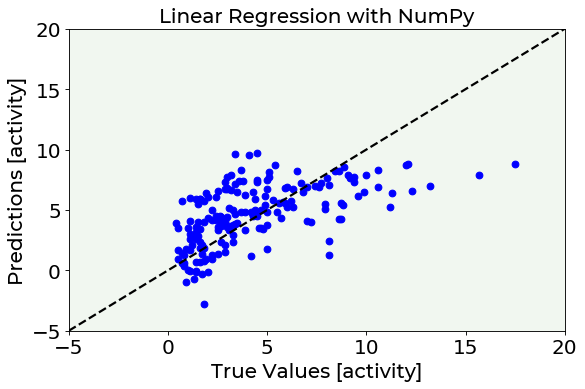

In [ ]:
test_predictions = np.dot(X_test,p) # predict radon activities using the linear regression 
# coefficients just calculated

# Predictions vs. True Values PLOT

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(test_y, test_predictions, marker = 'o', c = 'blue')
plt.plot([-5,20], [-5,20], color = 'black', ls = '--')

plt.ylabel('Predictions [activity]', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('True Values [activity]', fontproperties = fm.FontProperties(fname = f))
plt.title('Linear Regression with NumPy', fontproperties = fm.FontProperties(fname = f))

plt.ylim(-5, 20)
plt.xlim(-5, 20)

plt.axis(True)
ax.set_facecolor((241/255.0, 247/255.0, 240/255.0))
plt.show()

## Further Readings

**NumPy package**

1. All documentation (with lots of tutorial and examples already implemented): https://numpy.org/doc/stable/